<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Copy_of_Spring_2022_Module_6_B_From_Count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 6 includes stones 46 through 47 and primarily practices the CI outcome. For those reading the OER text, we are in [Chapter 8](https://openstax.org/books/introductory-statistics/pages/8-introduction). 

Code Block 1: Gathers Data 

Code Block 2: Using Randomness 

Code Block 3: Using a Formula 


In [2]:
### Code Block 1 
# Build Data and establish confidence level 

sample_count= 1000
sample_size = 1250
z_conf=0.85 


sample_complement = sample_size-sample_count 
data=rep(c(1,0),c(sample_count,sample_complement))   # repeats 1 sample_count times and 0 sample_complement times. 


Sample size: 1250 observational units.
Original sample statistic is a proportion equal to 0.8.
With a confidence level of 85%, the actual population paramater is between 0.7837599 and 0.8163434.


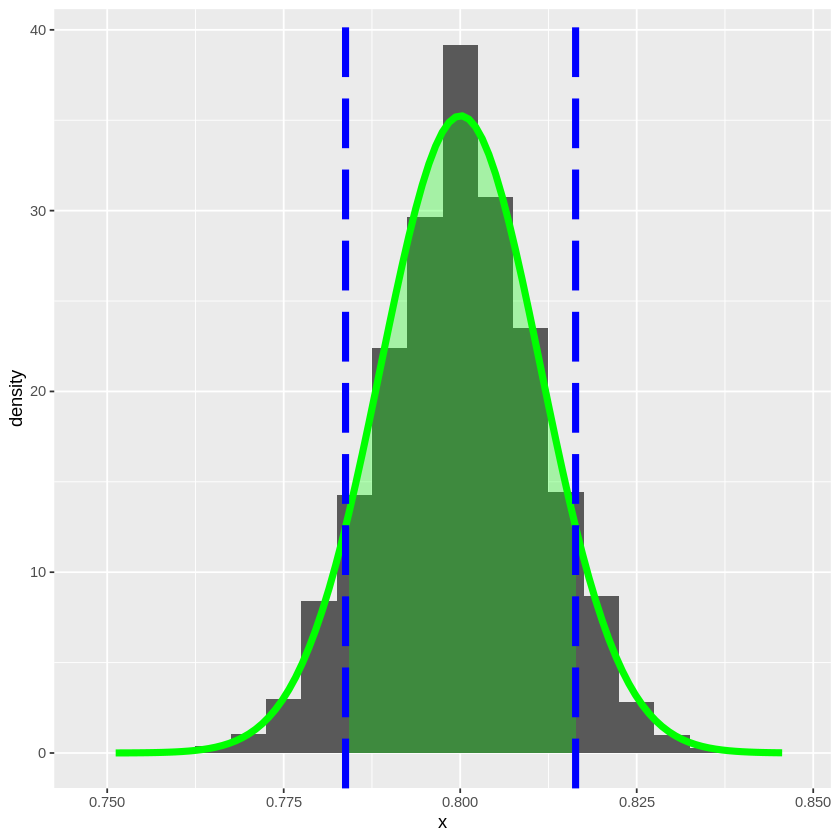

In [3]:
### Code Block 2
# Using randomness 

library(ggplot2)

alpha = 1-z_conf 
zsc=qnorm(z_conf + alpha/2)

size=length(data)
cat("Sample size:", size, "observational units.\n")

test <- 0
test_runs = 100000
for(i in 1:test_runs){
  test[i] = mean( sample(data,size,replace=TRUE))
  }


cat(sep="","Original sample statistic is a proportion equal to ", mean(data),".\n")

Boot = data.frame(x=test)
Boot_mean = mean(Boot$x)
Boot_sd = sd(Boot$x)
Boot_left=Boot_mean - zsc*Boot_sd
Boot_right=Boot_mean + zsc*Boot_sd 
Boots=c(Boot_left,Boot_right)

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population paramater is between ", Boot_left, " and ", Boot_right, ".\n")



# Fancy function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,Boot_mean, Boot_sd)
  lb = Boot_mean - numsd*Boot_sd  #left bound 
  rb = Boot_mean + numsd*Boot_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}

ggplot( Boot, aes(x)) + 
  geom_histogram(aes(y=..density..),binwidth=0.005) + 
  stat_function( fun=dnorm,    args=list(mean=Boot_mean, sd=Boot_sd), col="green", size=2) +
  stat_function( fun=dnorm_sd, args=list(numsd=zsc),  geom="area",  fill="green", alpha=0.3 ) + 
  geom_vline( xintercept=Boots,  linetype="longdash",  col="blue", size=2) 

In [4]:
### Code Block 3 
# Using a formula 

ci = t.test(data, conf.level=z_conf)
me = (ci$conf.int[2] - ci$conf.int[1])/2 

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population", 
            " paramater is between ", ci$conf.int[1], " and ", ci$conf.int[2], ".\n")

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population", 
            " paramater is approximately ", ci$estimate, " with a margin ", 
            "of error of ", me, ".\n") 


With a confidence level of 85%, the actual population paramater is between 0.783697 and 0.816303.
With a confidence level of 85%, the actual population paramater is approximately 0.8 with a margin of error of 0.01630298.
